# ERNIE: 用信息实体增强语言表示

张正言1,2,3，许涵1,2,3，刘志远1,2,3†，蒋欣4，宋毛松1,2,3，刘群4 

1清华大学计算机科学与技术系，北京

2清华大学人工智能研究所，北京，中国

3清华大学智能技术与系统国家重点实验室，北京

4华为诺亚方舟实验室，华为技术有限公司







# 摘要

在大规模语料库上训练的BERT等神经语言表示模型能够很好地从纯文本中捕获丰富的语义模式，并经过微调，始终如一地证明各种NLP任务的性能。然而，现有的预训练语言模型很少考虑合并知识图(KGs)，这可以提供丰富的结构化知识事实，以更好地理解语言。我们认为知识结构中的信息实体可以通过外部知识增强语言表示。在本文中，我们利用大规模文本语料库和KGs来训练一个增强的语言表示模型(ERNIE)，它可以同时充分利用词汇、句法和知识信息。实验结果表明，ERNIE在各种知识驱动任务上都取得了显著的改进，与现有的BERT模型相比，ERNIE在其他常见的NLP任务上也有一定的改进。本文的源代码可以从https://github.com/thunlp /ERNIE获得。

# 1介绍
预训练语言表示模型，包括基于特征的语言表示模型(Mikolov et al.， 2013;彭宁顿等，2014;Peters等，2017,2018)和微调(戴和乐，2015;霍华德和鲁德，2018;雷德福等，2018;方法可以从文本中获取丰富的语言信息，从而使许多NLP应用受益。BERT (Devlin et al.， 2018)作为最新提出的模型之一，通过简单的微调获得各种NLP应用的最新结果，包括命名实体识别(Sang and De Meulder, 2003)、问答(Rajpurkar et al.， 2016);Zellers et al.， 2018)，自然语言推理(Bowman et al.， 2015)， 和文本分类 (Wang et al.， 2018)。

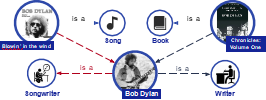
图1:为语言理解合并额外知识信息的示例。实线表示现有的知识事实。红色的虚线用红色表示从句子中提取的事实。蓝色的虚线用蓝色表示从句子中提取的事实。


虽然预训练的语言表示模型已经取得了良好的效果，并作为许多NLP任务的常规组件，但它们忽略了将知识信息纳入语言理解中。如图1所示，如果不知道Blowin ' in the Wind和Chronicles: Volume One分别是song和book，就很难认出Bob Dylan的两个职业，即，词曲作者和作家，在实体输入任务。此外，在关系分类任务中几乎不可能提取细粒度关系，例如composer和author。对于现有的预训练语言表示模型，这两句话在语法上是模糊的，就像“美国内布拉斯加大学卡尼尔分校中 UNK”。因此，考虑到丰富的知识信息可以导致更好的语言理解，并因此受益于各种知识驱动的应用程序，如实体类型和关系分类。

要将外部知识整合到语言表示模型中，有两个主要的挑战。(1)结构化知识编码:对于给定的文本，如何有效地提取和编码KGs中的相关信息事实，用于语言表示模型是一个重要的问题;(2)异构信息融合:语言表示的预训练过程与知识边缘表示过程有很大的不同，它导致两个独立的向量空间。因此，如何设计一个特殊的训练前目标来融合词汇、句法和知识信息是另一个挑战。

为了克服上述挑战，我们提出了增强的信息实体语言表示(ERNIE)，它在大规模文本语料库和知识图上预训练了一种语言表示模型

(1)为了提取和编码的知识信息,我们首先识别命名实体提到文本然后对齐这些提到相应的实体在KGs。而不是直接使用基于事实在KGs,我们编码KGs的图结构与知识嵌入算法如TransE(誉为et al ., 2013),然后把信息实体嵌入的作为ERNIE的输入。基于文本和KGs之间的对齐，将知识模块中的实体表示集成到语义模块的底层。

(2)与BERT相似，我们采用蒙面语言模型和下一个句子预测作为训练前的目标。此外，为了更好地融合文本和知识特征，我们设计了一个新的训练前目标，在输入文本中随机屏蔽一些指定的实体对齐，并要求模型从KGs中选择合适的实体来完成对齐。与仅使用本地上下文预测符号的现有预训练语言表示模型不同，我们的目标需要模型聚合上下文和知识事实来预测符号和实体，并生成知识渊博的语言表示模型。

我们对两个知识驱动的NLP任务进行了实验。、实体类型和关系分类。实验结果表明，ERNIE充分利用词汇、句法和知识信息，在这些知识驱动任务上明显优于现有的BERT模型。我们还对ERNIE的其他常见NLP任务进行了评估，ERNIE仍然取得了类似的结果。

# 2相关工作
为了从文本中获取语言信息，然后将这些信息用于特定的NLP任务，许多工作都致力于训练语言表示模型。这些预训练方法可分为两类，即基于功能的方法和微调方法。

早期工作(胶体伯特和韦斯顿，2008;Mikolov等，2013;Pennington等人(2014)专注于采用基于特征的方法将单词转换成分布式表示。由于这些预先训练的单词表示在文本语料库中捕获语法和语义信息，因此它们常常被用作各种NLP模型的输入嵌入和初始化参数，并且相对于随机初始化参数提供了显著的改进(Turian et al.， 2010)。由于这些词级模型往往存在词的多义性，Peters等(2018)进一步采用序列级模型(ELMo)来捕获跨不同语言上下文的复杂单词特征，并使用ELMo生成上下文感知的单词嵌入。

与上述基于特征的语言方法不同，Dai和Le(2015)只使用预先训练好的语言表示作为输入特征，在未标记文本上训练自动编码器，然后使用预先训练的模型架构和参数作为其他特定NLP模型的起点。受Dai和Le(2015)的启发，提出了更多用于微调的预训练语言表示模型。Howard和Ruder(2018)提出了AWD- LSTM (Merity et al.， 2017)来构建一个通用语言模型(ULMFiT)。Radford等(2018)提出了一种生成式预训练 Transformer(Vaswani等，2017)(GPT)来学习语言表示。Devlin et al.(2018)提出了一种基于多层Transformer(BERT)的深层双向模型，该模型可以实现各种NLP任务的最先进结果。

尽管基于特征和微调的语言表示模型都取得了巨大的成功，但它们忽略了知识信息的融合。最近的工作表明，注入额外的知识信息可以显著增强原始模型，如阅读理解(Mihaylov和Frank, 2018;Zhong等，2018)，机器翻译 (Zaremoodi等，2018)，自然语言推理 (Chen等，2018)，知识问答 (Han等，2018a)， 和对话系统 (Madotto等，2018)。因此，我们认为额外的知识信息可以有效地受益于现有的预训练模型。在本文中，我们利用语料库和KGs来训练一个基于BERT的增强语言表示模型。





# 3的方法
在本节中,我们目前的ERNIE的总体框架及其具体实现,包括模型架构在3.2节,这部小说预训练任务设计为信息实体编码和异构融合的形成在3.4节,和细粒度组件的细节调优过程在3.5节。

## 3.1 记法
我们将符号序列表示为w1，…， wn，其中n为符号序列的长度。同时，我们将与给定符号对齐的实体序列表示为e1，…， em，其中m为实体序列的长度。注意，在大多数情况下m不等于n，因为不是每个符号都可以对齐到KGs中的一个实体。此外，我们将包含所有符号的整个词汇表表示为V，将包含KGs中的所有实体的实体列表表示为E。如果符号w具有对应的实体e，则将其对齐定义为f (w) = e。在本文中，我们将一个实体对齐到其命名实体短语中的第一个符号，如图2所示。

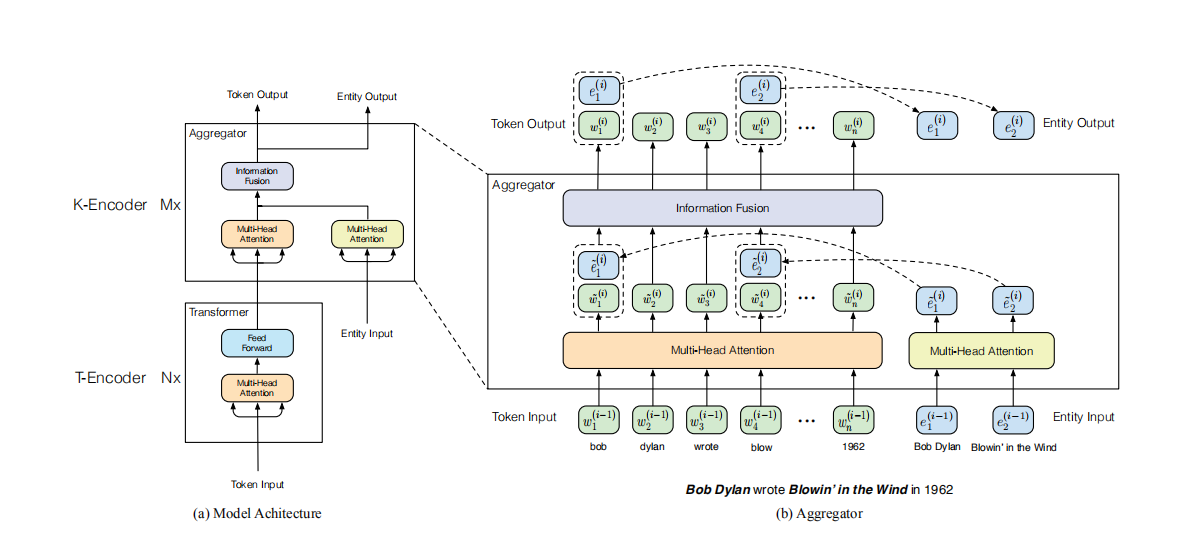
图2:左边是ERNIE的架构。右边的部分是用于符号和实体的输入相互集成的聚合器。信息融合层采用两种输入方式:一种是符号嵌入，另一种是符号嵌入与实体嵌入的串联。信息融合后，为下一层输出新的符号嵌入和实体嵌入。

## 3.2模型架构
如图2所示，ERNIE的整个模型架构由两个堆叠的模块组成:
(1)底层文本编码器(T-Encoder)负责捕捉基本词法和句法信息从输入符号,和(2)上知识渊博的编码器(K-Encoder)负责额外的符号面向知识信息集成到文本信息从底层层,这样我们就可以表示异构信息的符号和实体联合特征空间。此外，我们将文本编码层的个数表示为N, k编码层的个数表示为M。

具体来说，给定一个符号序列{w1，…， wn}及其对应实体序列{e1，…em},文本编码首先对每个标记的符号嵌入、段嵌入、位置嵌入进行求和，计算其输入嵌入，然后计算词法和句法特征{w1，…， wn}如下，{w1，…， wn} = T-Encoder({w1，…wn}),其中T-Encoder()是一种多层双向Transformer编码器。由于T-Encoder()与它在BERT中的实现是相同的，并且BERT是普遍存在的，所以我们排除了对这个模块的全面描述，并参考Devlin et al.(2018)和Vaswani et al.(2017)。

之后计算{w1，…，wn}, ERNIE采用知识丰富的编码器K-Encoder将知识信息注入语言表示中。具体来说，我们表示{e1，…， em}及其实体嵌入{e1，…em}，通过有效的知识嵌入模型TransE对其进行预处理。 然后，两个{w1…， wn}和{e1，…em}输入到K-Encoder中，融合异构信息，计算最终的输出嵌入。
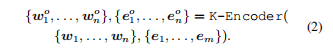
{w1o，…， wno}和{e1o，…， eno}将作为特定任务的特征。更多关于知识丰富的编码器K-Encoder的细节将在3.3节中介绍。

## 3.3知识渊博的编码器
如图2所示，知识丰富的编码器K-Encoder由堆叠的聚合器组成，这些聚合器设计用于对符号和实体进行编码，并融合它们的异构特性。在第i个聚合器中，输入符号嵌入{w1(i - 1)，…wn(i−1)}和实体聚集器{e1(i-1),...,em(i-1)}分别注入两个多头自关注(MH-ATTs)
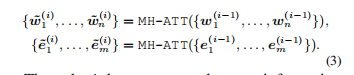

然后，第i个聚合器采用信息融合层实现符号与实体序列的相互集成，并计算每个令牌与实体的输出嵌入层。对于符号wj及其对齐实体ek = f (wj)，信息融合过程如下
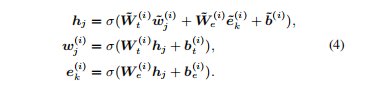

其中hj是集成符号和实体信息的内部隐藏状态。σ(·)是非线性激活函数,通常是GELU函数(Hendrycks Gimpel, 2016)。对于没有对应实体的符号，信息融合层在不集成的情况下计算输出嵌入，
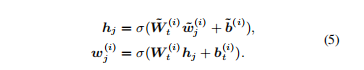

简便起见，第i个聚集器操作记为:
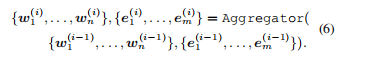
由顶级聚合器计算的符号和实体的输出嵌入将用作知识丰富的编码器K-Encoder的最终输出嵌入。

## 3.4注入知识的预训练

为了将知识注入到信息实体的语言表示中，我们提出了一种新的ERNIE训练前任务，它随机地隐藏了一些符号实体对齐，然后要求系统根据对齐的符号来预测所有相应的实体。由于我们的任务类似于训练一个去噪的自动编码器，我们将这个过程称为去噪实体自动编码器(dEA)。考虑到softmax层的size相当大，因此我们只需要系统根据给定的实体序列来预测实体，而不是KGs中的所有实体。给定符号序列{w1,...,wn}及其对应的实体序列{e1，…,em}，我们定义符号wi的对齐实体分布如下:
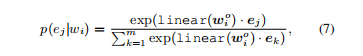
其中linear(·)为线性层。式7将用于计算dEA的交叉熵损失函数。

考虑到符号实体对齐存在一些错误，我们对去噪实体自动编码器(dEA)执行以下操作:(1)在5%的时间内，对于给定的符号实体对齐，我们用另一个随机实体替换该实体，目标是训练我们的模型纠正符号与错误实体对齐的错误;(2)在15%的时间内，我们对符号实体比对进行了掩码，目的是训练我们的模型，纠正实体比对系统不能提取所有现有比对的错误;(3)其余时间，我们保持符号实体对齐不变，目的是鼓励我们的模型将实体信息集成到符号表示中，以便更好地理解语言。

与BERT相似，ERNIE还采用了掩蔽语言模型(MLM)和下一个句子预测(NSP)作为预训练任务，使ERNIE能够从文本中的标记中捕获词汇和语法信息。这些训练前任务的更多细节可以从Devlin et al.(2018)中找到。

## 3.5针对特定任务进行微调

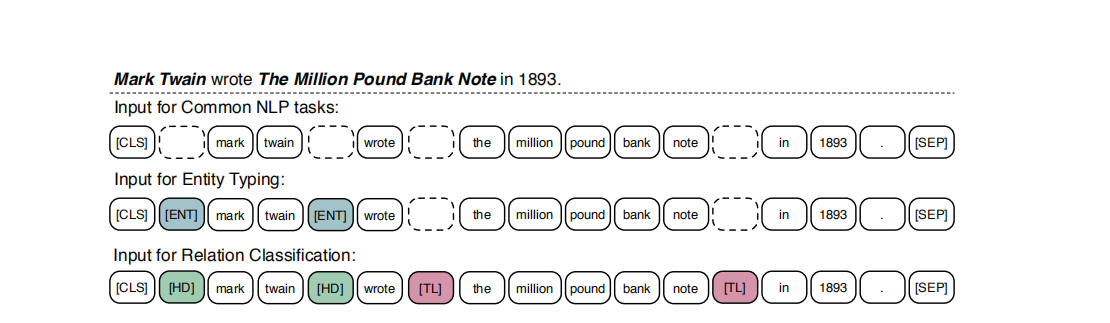
图3:修改特定任务的输入序列。为了在不同类型的输入之间对齐标记，我们使用点矩形作为占位符。彩色矩形表示特定的标记标记。

如图3所示，对于各种常见的NLP任务，ERNIE可以采用类似于BERT的微调过程。我们可以将第一个符号(对应于特殊的[CLS]符号)的最终输出嵌入作为特定任务的输入序列的表示。对于一些知识驱动的任务，我们设计了特殊的微调过程:

对于关系分类，该任务要求系统根据上下文对给定实体对的关系标签进行分类。对ERNIE进行关系分类的微调最直接的方法是将池化层应用于给定实体提到的最终输出嵌入，并用它们提到的用于分类的嵌入连接来表示给定的实体对。在本文中，我们设计了另一种方法，它通过添加两个标记标记来修改输入标记序列，以突出显示提到的实体。这些额外的标记标记在传统关系分类模型中扮演类似于位置嵌入的角色。然后，我们还采用[CLS]令牌嵌入来进行分类。注意，我们分别为head实体和tail实体设计了不同的令牌[HD]和[TL]。

实体类型的特定微调过程是关系分类的简化版本。由于之前的类型模型充分利用了上下文嵌入和实体提到嵌入，我们认为使用提标记令牌[ENT]修改后的输入序列可以指导ERNIE专心地组合上下文信息和实体提到信息。
